In [52]:
# as usual we need to import all the key libraries and modules
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
# let's get a network from the folder data
a=open('data/USPTO_2012_5_proj_edgelist_NEW.csv','r')
for i in a:
    n=i.strip().split()
    print (n)
a.close()

['Nippon', 'Light', 'Metal', 'Company', 'Limited,Novelis', 'Inc.']
['Nippon', 'Light', 'Metal', 'Company', 'Limited,Honda', 'Motor', 'Co.', 'Ltd.']
['Novelis', 'Inc.,Honda', 'Motor', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Takata', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Nifco', 'Inc.']
['Honda', 'Motor', 'Co.', 'Ltd.,Keihin', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Illinois', 'Tool', 'Works', 'Inc.']
['Honda', 'Motor', 'Co.', 'Ltd.,Tokai', 'Rubber', 'Industries', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Honda', 'Access', 'Corp.']
['Honda', 'Motor', 'Co.', 'Ltd.,NSK', 'LTD.']
['Honda', 'Motor', 'Co.', 'Ltd.,Saga', 'Tekkohsho', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Nissin', 'Kogyo', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Bridgestone', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Gentest', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Denso', 'Corporation']
['Toyota', 'Jidosha', 'Kabushiki', 'Kaisha,MEC', 'International', 'Co.', 'Ltd.']
['Toyota', 

In [54]:
# this is a simple list of edges
# let's store the network and plot it
G=nx.Graph()
a=open('data/USPTO_2012_5_proj_edgelist_NEW.csv','r')
for i in a:
    n=i.strip().split()
    G.add_edge(n[0],n[1])
a.close()

print ("Number of nodes =", G.number_of_nodes())
print ("Number of edges =", G.number_of_edges())

Number of nodes = 23
Number of edges = 13


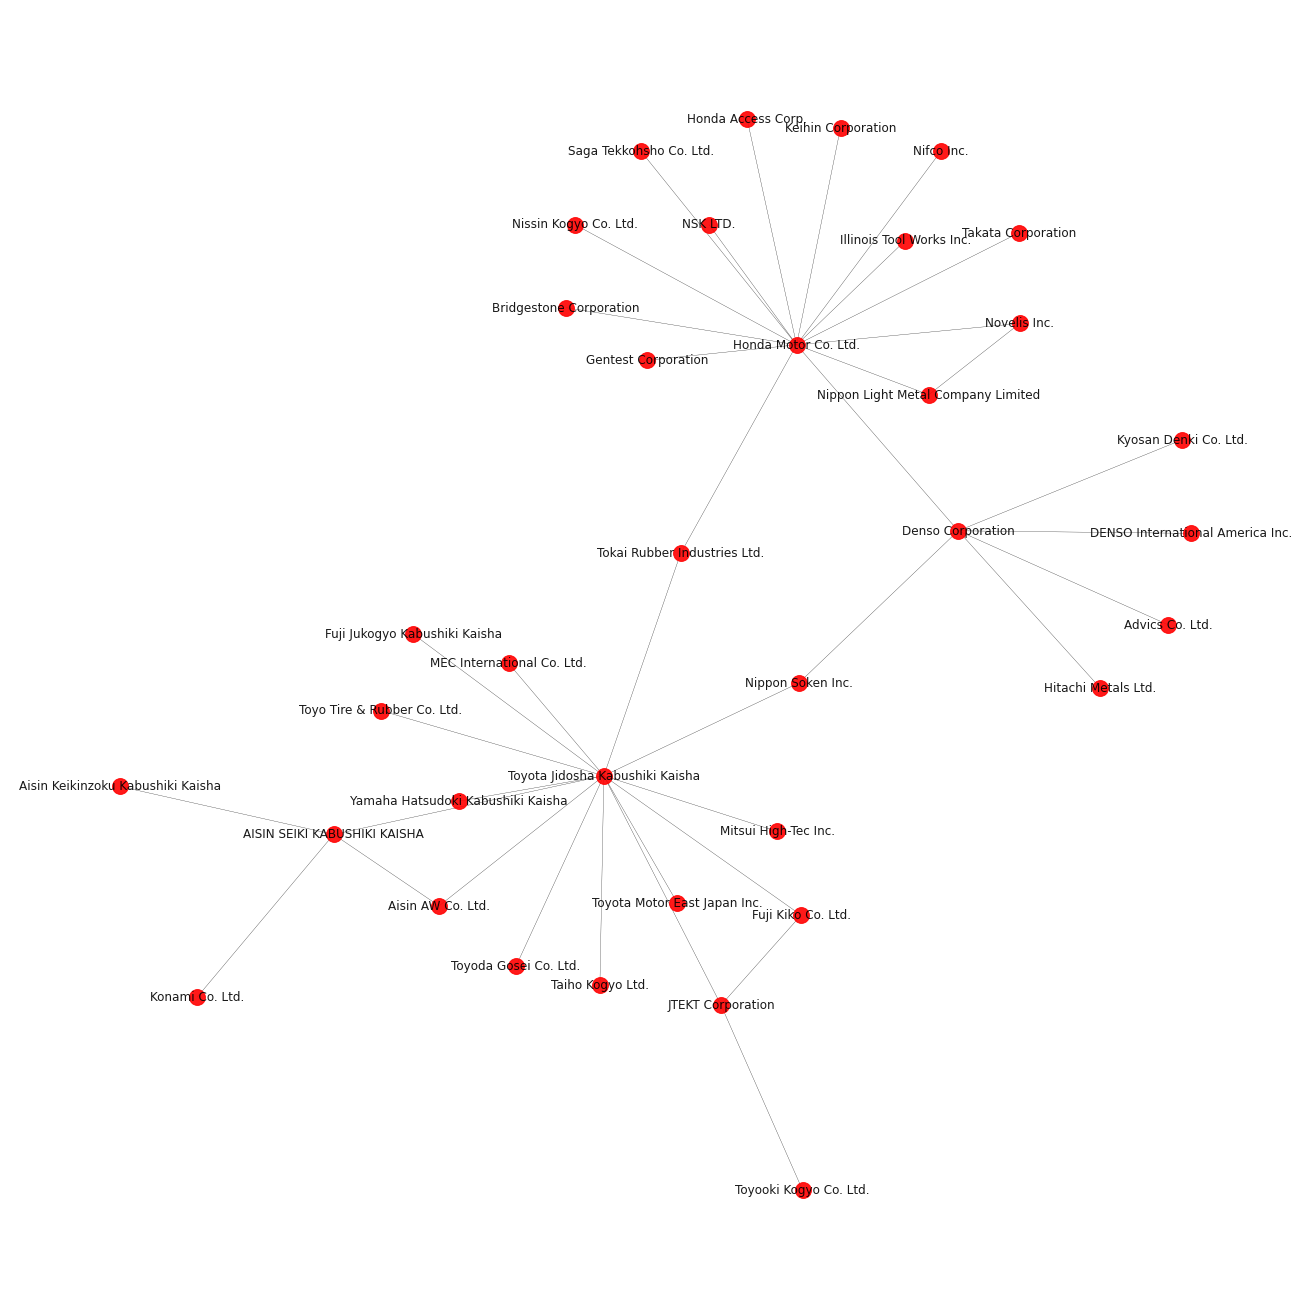

In [109]:
ids_label={} # this dictionary is needed to show the node ids
counter=0
for i in G.nodes():
    ids_label[i]=i
    counter+=1
    
plt.figure(1,figsize=(18,18))

nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black"
        ,node_color="Red",labels=ids_label,font_size=12)

In [170]:
# there are several measures we discussed in the lecture to measure the cohesiveness of networks
# density: the ratio between the number of edges and the total possible number of edges
# let's compute it

# what is the highest number of edges in a network with N nodes

N=G.number_of_nodes() # this is the number of nodes

E_max= N*(N-1.)/2.  # this is the largest number of indirected edges

print (E_max)

630.0


In [171]:
# let's create a function that computes the largest number of edges in a network

def max_edges(G):
    N=G.number_of_nodes() # this is the number of nodes

    E_max= N*(N-1.)/2.  # this is the largest number of indirected edges

    return E_max

In [172]:
print (max_edges(G))

630.0


In [173]:
# the density is simply E/E_max

E=G.number_of_edges()
Density=E/max_edges(G)

print (Density)

0.06190476190476191


In [174]:
# another quantity is the clustering
# how many of my friends are themself friends?

clustering=nx.clustering(G) # this can be easily calculated using the function clustering

In [175]:
# let's see the values for each node
for i in clustering:
    print (i,clustering[i])

Nippon Light Metal Company Limited 1.0
Novelis Inc. 1.0
Honda Motor Co. Ltd. 0.01098901098901099
Takata Corporation 0
Nifco Inc. 0
Keihin Corporation 0
Illinois Tool Works Inc. 0
Tokai Rubber Industries Ltd. 0
Honda Access Corp. 0
NSK LTD. 0
Saga Tekkohsho Co. Ltd. 0
Nissin Kogyo Co. Ltd. 0
Bridgestone Corporation 0
Gentest Corporation 0
Denso Corporation 0
Toyota Jidosha Kabushiki Kaisha 0.02197802197802198
MEC International Co. Ltd. 0
Fuji Jukogyo Kabushiki Kaisha 0
Toyo Tire & Rubber Co. Ltd. 0
Toyoda Gosei Co. Ltd. 0
Yamaha Hatsudoki Kabushiki Kaisha 0
Toyota Motor East Japan Inc. 0
Nippon Soken Inc. 0
Fuji Kiko Co. Ltd. 1.0
Aisin AW Co. Ltd. 1.0
AISIN SEIKI KABUSHIKI KAISHA 0.16666666666666666
Taiho Kogyo Ltd. 0
JTEKT Corporation 0.3333333333333333
Mitsui High-Tec Inc. 0
Aisin Keikinzoku Kabushiki Kaisha 0
Konami Co. Ltd. 0
Toyooki Kogyo Co. Ltd. 0
Hitachi Metals Ltd. 0
Advics Co. Ltd. 0
DENSO International America Inc. 0
Kyosan Denki Co. Ltd. 0


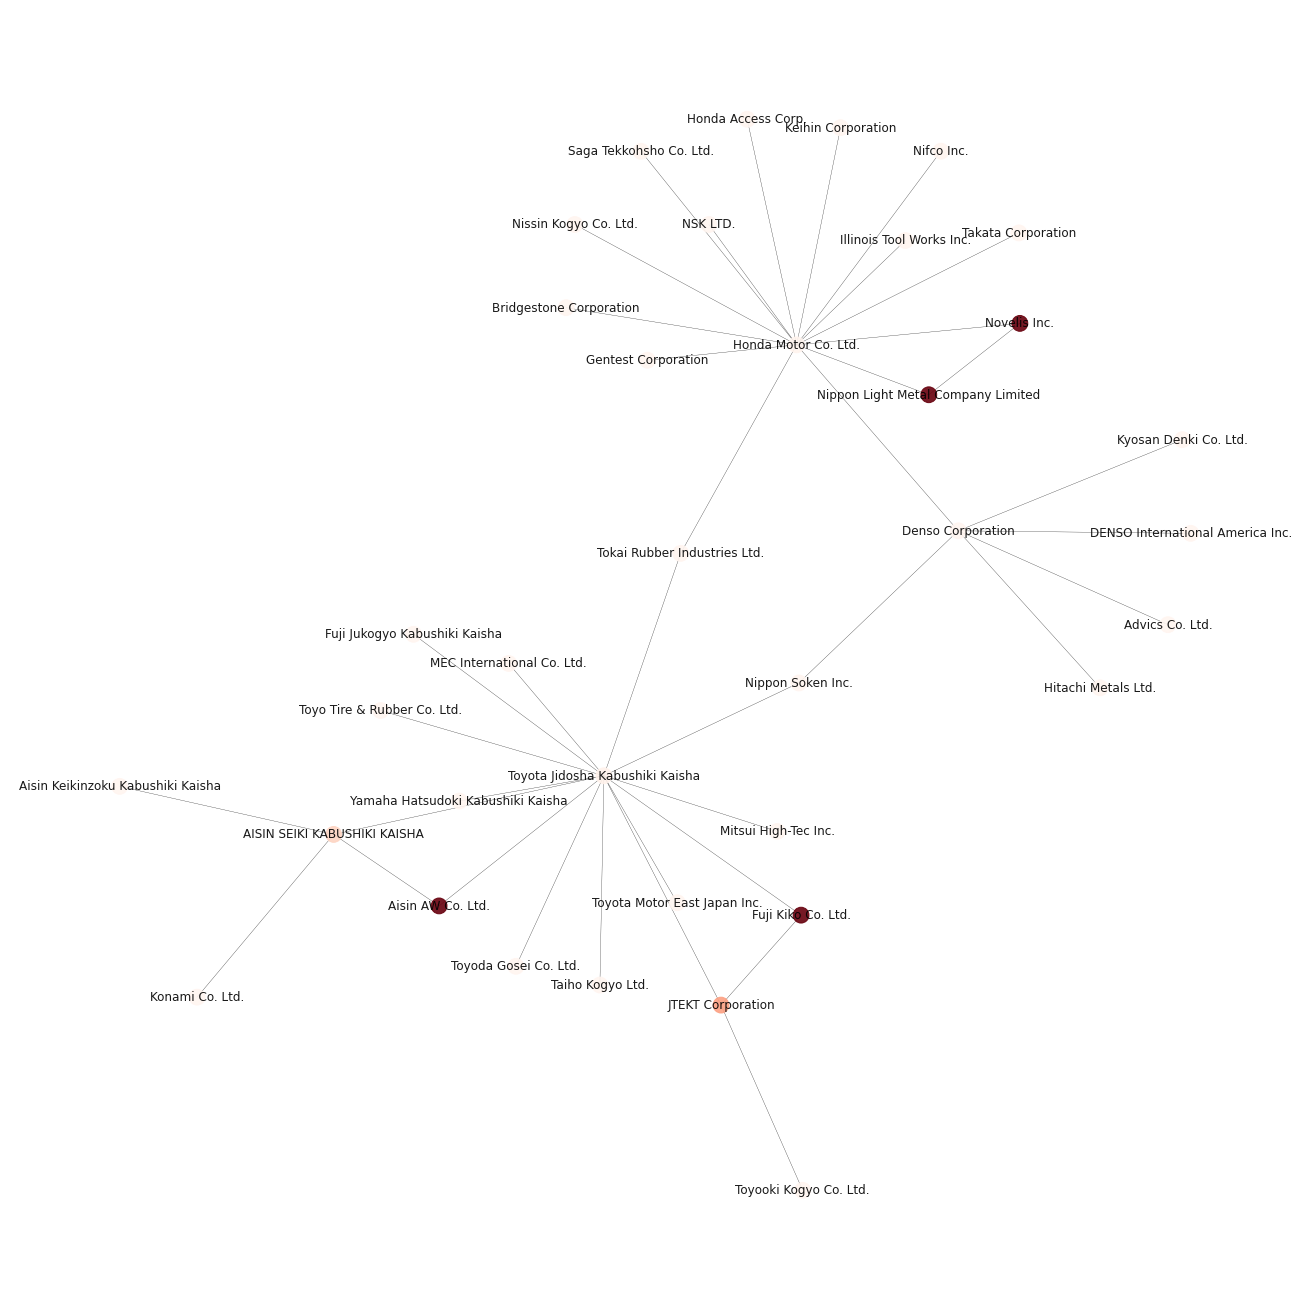

In [211]:
# how do we interpret these numbers?
# how they are connected to innovation/exploitation?

# let's plot the network using these as attribibutes

color_code=[]
for i in clustering:
    color_code.append(clustering[i])
    
    
plt.figure(1,figsize=(18,18))
    


nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black",cmap='Reds'
        ,node_color=color_code,labels=ids_label,font_size=12)

In [176]:
# another measure is the average clustering
average_clustering=0.
for i in clustering:
    average_clustering+=clustering[i]/G.number_of_nodes()
    
print ("Average clustering =","{:.2f}".format(average_clustering))

Average clustering = 0.13


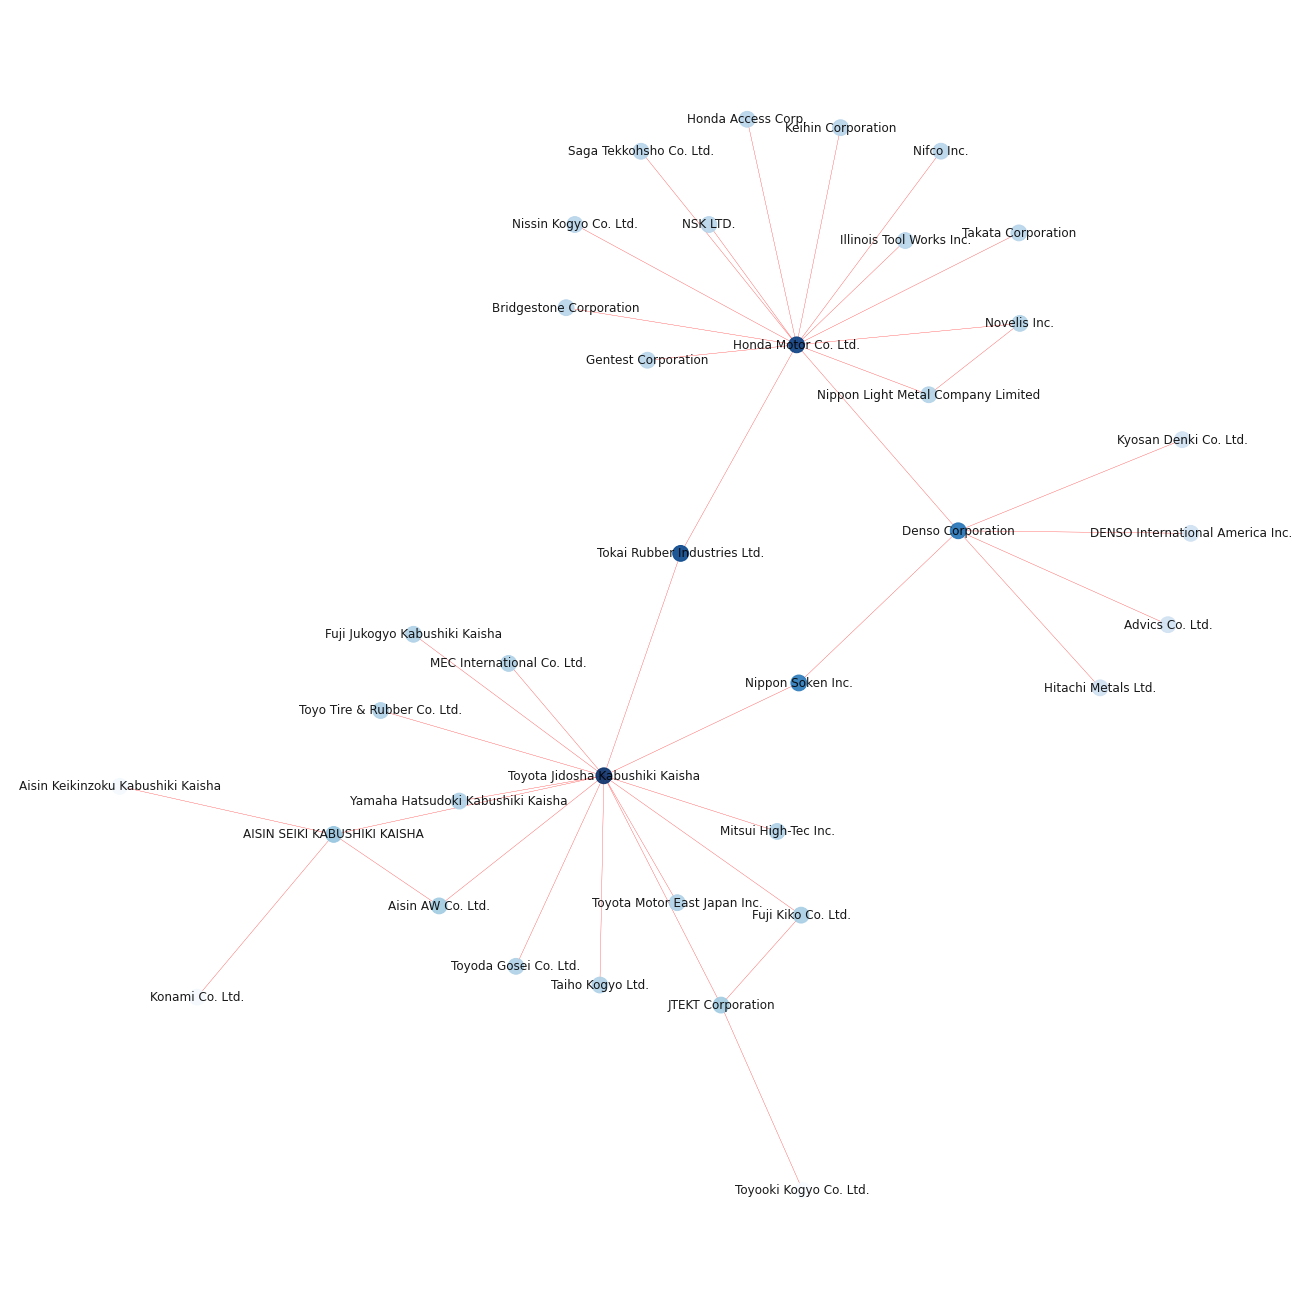

In [213]:
# another measure to quantify the level of cohesiveness is a centrality metric: closeness

closeness=nx.closeness_centrality(G) # by now you should remember this function


color_code=[]
for i in closeness:
    color_code.append(closeness[i])

plt.figure(1,figsize=(18,18))
    
nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Red",cmap='Blues'
        ,node_color=color_code,labels=ids_label,font_size=12)

In [177]:
# what do we see? what do we learn?

# let's see the values of the closeness!
for i in closeness:
    print (i,"{:.2f}".format(closeness[i]))

Nippon Light Metal Company Limited 0.33
Novelis Inc. 0.33
Honda Motor Co. Ltd. 0.47
Takata Corporation 0.32
Nifco Inc. 0.32
Keihin Corporation 0.32
Illinois Tool Works Inc. 0.32
Tokai Rubber Industries Ltd. 0.47
Honda Access Corp. 0.32
NSK LTD. 0.32
Saga Tekkohsho Co. Ltd. 0.32
Nissin Kogyo Co. Ltd. 0.32
Bridgestone Corporation 0.32
Gentest Corporation 0.32
Denso Corporation 0.43
Toyota Jidosha Kabushiki Kaisha 0.49
MEC International Co. Ltd. 0.33
Fuji Jukogyo Kabushiki Kaisha 0.33
Toyo Tire & Rubber Co. Ltd. 0.33
Toyoda Gosei Co. Ltd. 0.33
Yamaha Hatsudoki Kabushiki Kaisha 0.33
Toyota Motor East Japan Inc. 0.33
Nippon Soken Inc. 0.42
Fuji Kiko Co. Ltd. 0.34
Aisin AW Co. Ltd. 0.34
AISIN SEIKI KABUSHIKI KAISHA 0.35
Taiho Kogyo Ltd. 0.33
JTEKT Corporation 0.34
Mitsui High-Tec Inc. 0.33
Aisin Keikinzoku Kabushiki Kaisha 0.26
Konami Co. Ltd. 0.26
Toyooki Kogyo Co. Ltd. 0.26
Hitachi Metals Ltd. 0.30
Advics Co. Ltd. 0.30
DENSO International America Inc. 0.30
Kyosan Denki Co. Ltd. 0.30


In [129]:
# what about brokerage?
# we discussed several measures: effective size, constraint, betweenness

# to better understand these let's consider another network

G=nx.Graph()
a=open('data/USPTO_2012_5_proj_edgelist_NEW.csv','r')
for i in a:
    n=i.strip().split()
    G.add_edge(n[0],n[1])
a.close()

print ("Number of nodes =", G.number_of_nodes())
print ("Number of edges =", G.number_of_edges())

Number of nodes = 23
Number of edges = 13


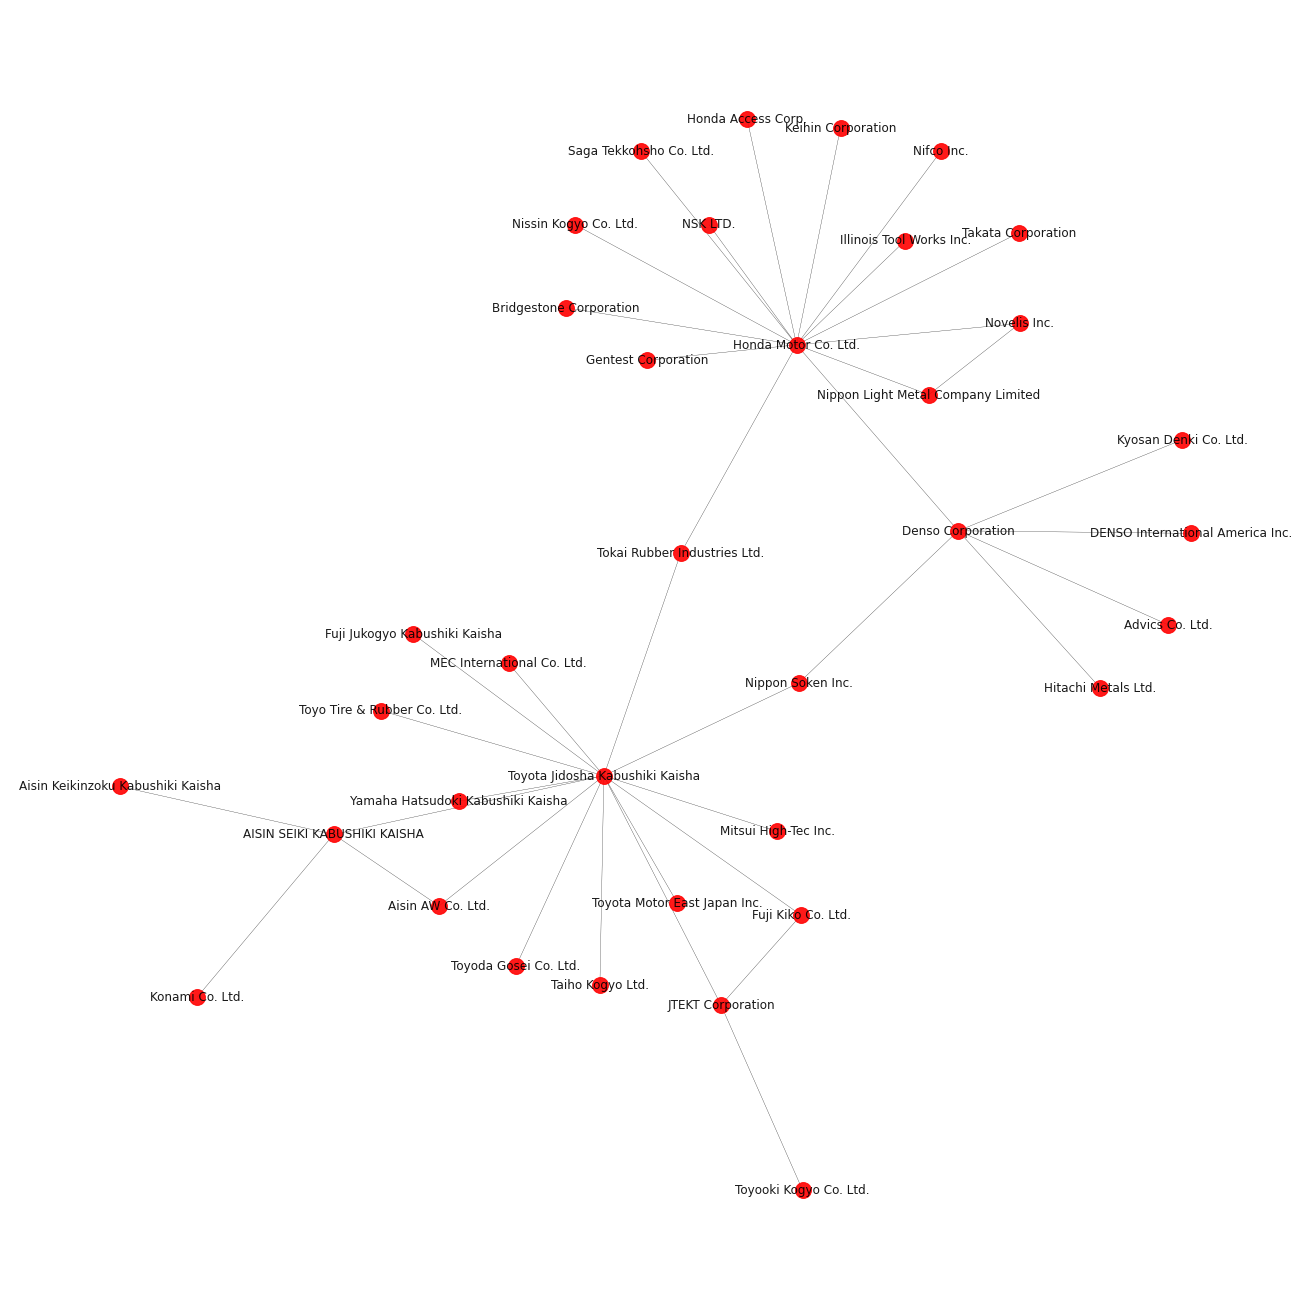

In [162]:
# let's plot it

ids_label={} # this dictionary is needed to show the node ids
counter=0
for i in G.nodes():
    ids_label[i]=i
    counter+=1

plt.figure(1,figsize=(18,18))
    
nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black"
        ,node_color="Red",labels=ids_label,font_size=12)

In [178]:
# the effective size can be computed using a networkx function

eff_size=nx.effective_size(G)

In [179]:
# let's see the values for each node

for i in eff_size:
    print (i,eff_size[i])

Nippon Light Metal Company Limited 1.0
Novelis Inc. 1.0
Honda Motor Co. Ltd. 13.857142857142858
Takata Corporation 1.0
Nifco Inc. 1.0
Keihin Corporation 1.0
Illinois Tool Works Inc. 1.0
Tokai Rubber Industries Ltd. 2.0
Honda Access Corp. 1.0
NSK LTD. 1.0
Saga Tekkohsho Co. Ltd. 1.0
Nissin Kogyo Co. Ltd. 1.0
Bridgestone Corporation 1.0
Gentest Corporation 1.0
Denso Corporation 6.0
Toyota Jidosha Kabushiki Kaisha 13.714285714285714
MEC International Co. Ltd. 1.0
Fuji Jukogyo Kabushiki Kaisha 1.0
Toyo Tire & Rubber Co. Ltd. 1.0
Toyoda Gosei Co. Ltd. 1.0
Yamaha Hatsudoki Kabushiki Kaisha 1.0
Toyota Motor East Japan Inc. 1.0
Nippon Soken Inc. 2.0
Fuji Kiko Co. Ltd. 1.0
Aisin AW Co. Ltd. 1.0
AISIN SEIKI KABUSHIKI KAISHA 3.5
Taiho Kogyo Ltd. 1.0
JTEKT Corporation 2.3333333333333335
Mitsui High-Tec Inc. 1.0
Aisin Keikinzoku Kabushiki Kaisha 1.0
Konami Co. Ltd. 1.0
Toyooki Kogyo Co. Ltd. 1.0
Hitachi Metals Ltd. 1.0
Advics Co. Ltd. 1.0
DENSO International America Inc. 1.0
Kyosan Denki Co. Ltd. 1

In [180]:
for i in eff_size:
    print (i,1,eff_size[i],G.degree(i))

Nippon Light Metal Company Limited 1 1.0 2
Novelis Inc. 1 1.0 2
Honda Motor Co. Ltd. 1 13.857142857142858 14
Takata Corporation 1 1.0 1
Nifco Inc. 1 1.0 1
Keihin Corporation 1 1.0 1
Illinois Tool Works Inc. 1 1.0 1
Tokai Rubber Industries Ltd. 1 2.0 2
Honda Access Corp. 1 1.0 1
NSK LTD. 1 1.0 1
Saga Tekkohsho Co. Ltd. 1 1.0 1
Nissin Kogyo Co. Ltd. 1 1.0 1
Bridgestone Corporation 1 1.0 1
Gentest Corporation 1 1.0 1
Denso Corporation 1 6.0 6
Toyota Jidosha Kabushiki Kaisha 1 13.714285714285714 14
MEC International Co. Ltd. 1 1.0 1
Fuji Jukogyo Kabushiki Kaisha 1 1.0 1
Toyo Tire & Rubber Co. Ltd. 1 1.0 1
Toyoda Gosei Co. Ltd. 1 1.0 1
Yamaha Hatsudoki Kabushiki Kaisha 1 1.0 1
Toyota Motor East Japan Inc. 1 1.0 1
Nippon Soken Inc. 1 2.0 2
Fuji Kiko Co. Ltd. 1 1.0 2
Aisin AW Co. Ltd. 1 1.0 2
AISIN SEIKI KABUSHIKI KAISHA 1 3.5 4
Taiho Kogyo Ltd. 1 1.0 1
JTEKT Corporation 1 2.3333333333333335 3
Mitsui High-Tec Inc. 1 1.0 1
Aisin Keikinzoku Kabushiki Kaisha 1 1.0 1
Konami Co. Ltd. 1 1.0 1
Toyoo

In [181]:
# which are the nodes with the highest values of effective size

list_es=[]
for i in eff_size:
    list_es.append([eff_size[i],i])
    
list_es=sorted(list_es,reverse=True)

for i in list_es:
    print (i[1],i[0],G.degree(i[1]))  # we need to compare the number with the degree which is the highest possible
                                     

Honda Motor Co. Ltd. 13.857142857142858 14
Toyota Jidosha Kabushiki Kaisha 13.714285714285714 14
Denso Corporation 6.0 6
AISIN SEIKI KABUSHIKI KAISHA 3.5 4
JTEKT Corporation 2.3333333333333335 3
Tokai Rubber Industries Ltd. 2.0 2
Nippon Soken Inc. 2.0 2
Yamaha Hatsudoki Kabushiki Kaisha 1.0 1
Toyota Motor East Japan Inc. 1.0 1
Toyooki Kogyo Co. Ltd. 1.0 1
Toyoda Gosei Co. Ltd. 1.0 1
Toyo Tire & Rubber Co. Ltd. 1.0 1
Takata Corporation 1.0 1
Taiho Kogyo Ltd. 1.0 1
Saga Tekkohsho Co. Ltd. 1.0 1
Novelis Inc. 1.0 2
Nissin Kogyo Co. Ltd. 1.0 1
Nippon Light Metal Company Limited 1.0 2
Nifco Inc. 1.0 1
NSK LTD. 1.0 1
Mitsui High-Tec Inc. 1.0 1
MEC International Co. Ltd. 1.0 1
Kyosan Denki Co. Ltd. 1.0 1
Konami Co. Ltd. 1.0 1
Keihin Corporation 1.0 1
Illinois Tool Works Inc. 1.0 1
Honda Access Corp. 1.0 1
Hitachi Metals Ltd. 1.0 1
Gentest Corporation 1.0 1
Fuji Kiko Co. Ltd. 1.0 2
Fuji Jukogyo Kabushiki Kaisha 1.0 1
DENSO International America Inc. 1.0 1
Bridgestone Corporation 1.0 1
Aisin Kei

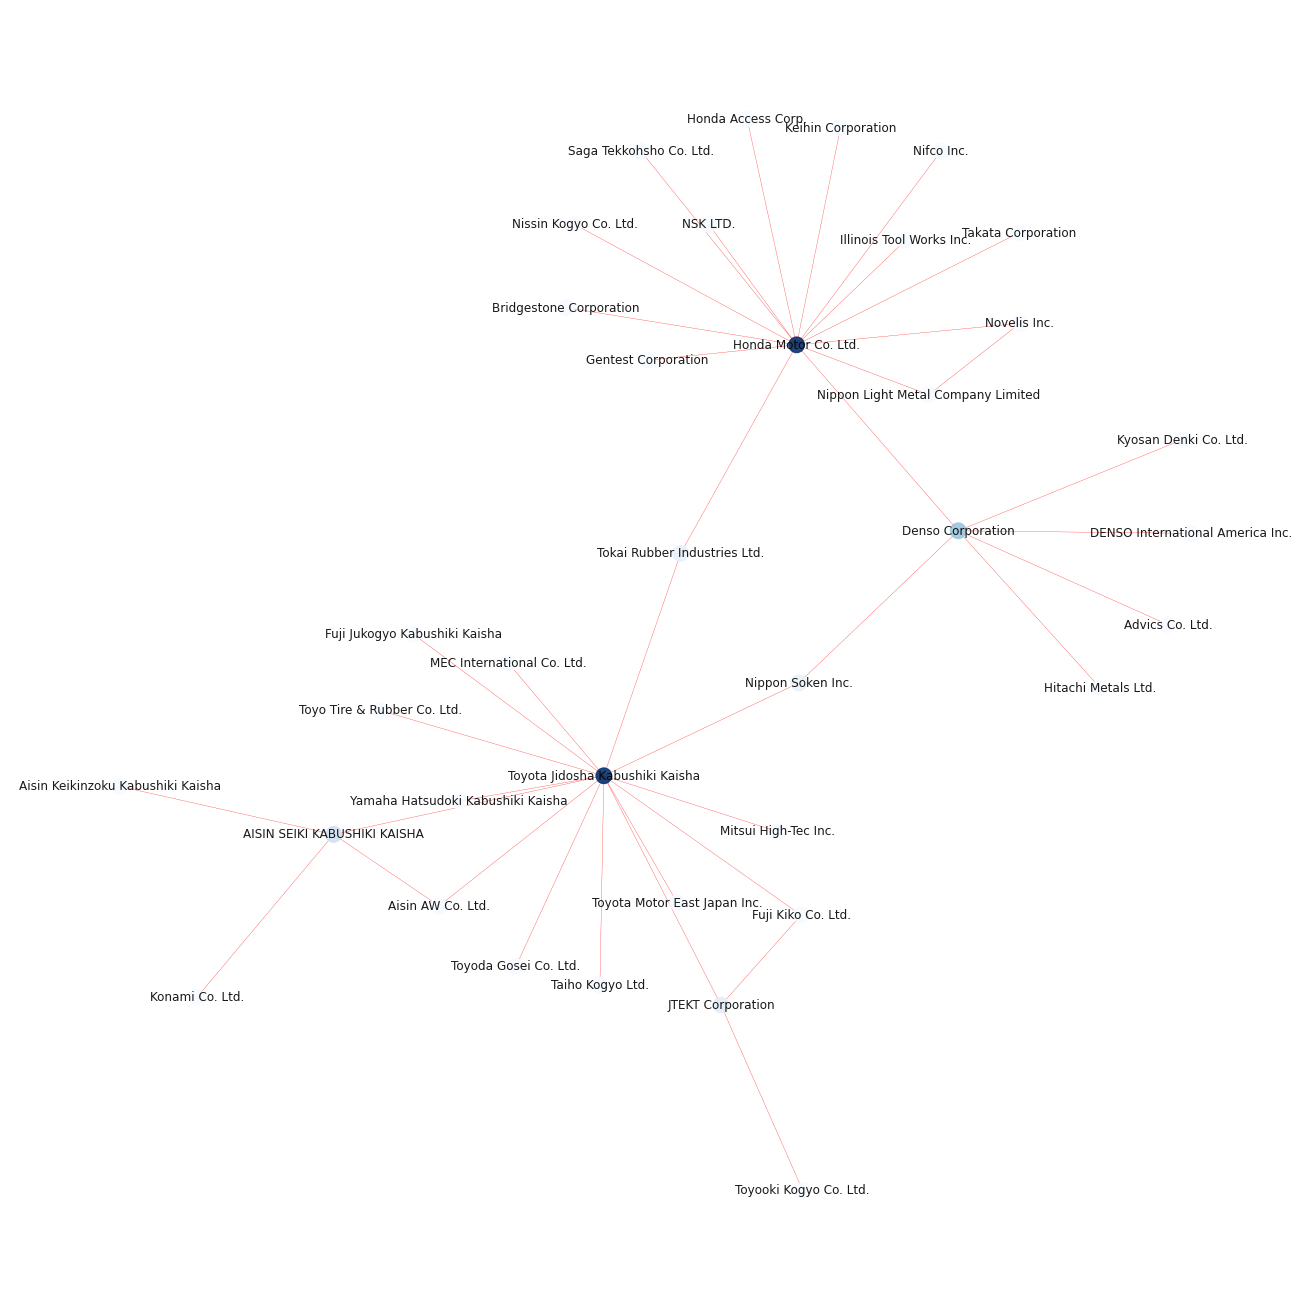

In [214]:
# let's plot the network using the effective size as attribute

color_code=[]
for i in eff_size:
    color_code.append(eff_size[i])
    
plt.figure(1,figsize=(18,18))

nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Red",cmap='Blues'
        ,node_color=color_code,labels=ids_label,font_size=12)

In [183]:
betweenness=nx.betweenness_centrality(G)

for i in betweenness:
    print (i,"{:.2f}".format(betweenness[i]))



Nippon Light Metal Company Limited 0.00
Novelis Inc. 0.00
Honda Motor Co. Ltd. 0.58
Takata Corporation 0.00
Nifco Inc. 0.00
Keihin Corporation 0.00
Illinois Tool Works Inc. 0.00
Tokai Rubber Industries Ltd. 0.35
Honda Access Corp. 0.00
NSK LTD. 0.00
Saga Tekkohsho Co. Ltd. 0.00
Nissin Kogyo Co. Ltd. 0.00
Bridgestone Corporation 0.00
Gentest Corporation 0.00
Denso Corporation 0.24
Toyota Jidosha Kabushiki Kaisha 0.67
MEC International Co. Ltd. 0.00
Fuji Jukogyo Kabushiki Kaisha 0.00
Toyo Tire & Rubber Co. Ltd. 0.00
Toyoda Gosei Co. Ltd. 0.00
Yamaha Hatsudoki Kabushiki Kaisha 0.00
Toyota Motor East Japan Inc. 0.00
Nippon Soken Inc. 0.13
Fuji Kiko Co. Ltd. 0.00
Aisin AW Co. Ltd. 0.00
AISIN SEIKI KABUSHIKI KAISHA 0.11
Taiho Kogyo Ltd. 0.00
JTEKT Corporation 0.06
Mitsui High-Tec Inc. 0.00
Aisin Keikinzoku Kabushiki Kaisha 0.00
Konami Co. Ltd. 0.00
Toyooki Kogyo Co. Ltd. 0.00
Hitachi Metals Ltd. 0.00
Advics Co. Ltd. 0.00
DENSO International America Inc. 0.00
Kyosan Denki Co. Ltd. 0.00


In [150]:
# let's consider a real network

a=open('data/USPTO_2012_5_proj_edgelist_NEW.csv','r',encoding='latin1')
for i in a:
    n=i.strip().split(',')
    print (n)
a.close()

['Nippon Light Metal Company Limited', 'Novelis Inc.']
['Nippon Light Metal Company Limited', 'Honda Motor Co. Ltd.']
['Novelis Inc.', 'Honda Motor Co. Ltd.']
['Honda Motor Co. Ltd.', 'Takata Corporation']
['Honda Motor Co. Ltd.', 'Nifco Inc.']
['Honda Motor Co. Ltd.', 'Keihin Corporation']
['Honda Motor Co. Ltd.', 'Illinois Tool Works Inc.']
['Honda Motor Co. Ltd.', 'Tokai Rubber Industries Ltd.']
['Honda Motor Co. Ltd.', 'Honda Access Corp.']
['Honda Motor Co. Ltd.', 'NSK LTD.']
['Honda Motor Co. Ltd.', 'Saga Tekkohsho Co. Ltd.']
['Honda Motor Co. Ltd.', 'Nissin Kogyo Co. Ltd.']
['Honda Motor Co. Ltd.', 'Bridgestone Corporation']
['Honda Motor Co. Ltd.', 'Gentest Corporation']
['Honda Motor Co. Ltd.', 'Denso Corporation']
['Toyota Jidosha Kabushiki Kaisha', 'MEC International Co. Ltd.']
['Toyota Jidosha Kabushiki Kaisha', 'Fuji Jukogyo Kabushiki Kaisha']
['Toyota Jidosha Kabushiki Kaisha', 'Toyo Tire & Rubber Co. Ltd.']
['Toyota Jidosha Kabushiki Kaisha', 'Toyoda Gosei Co. Ltd.']
['T

In [184]:
# let's store the network
a=open('data/USPTO_2012_5_proj_edgelist_NEW.csv','r',encoding='latin1')
G=nx.Graph()

for i in a:
        n=i.strip().split(",")
        G.add_edge(n[0],n[1])

a.close()

print ("N=",G.number_of_nodes())
print ("E=",G.number_of_edges())

N= 36
E= 39


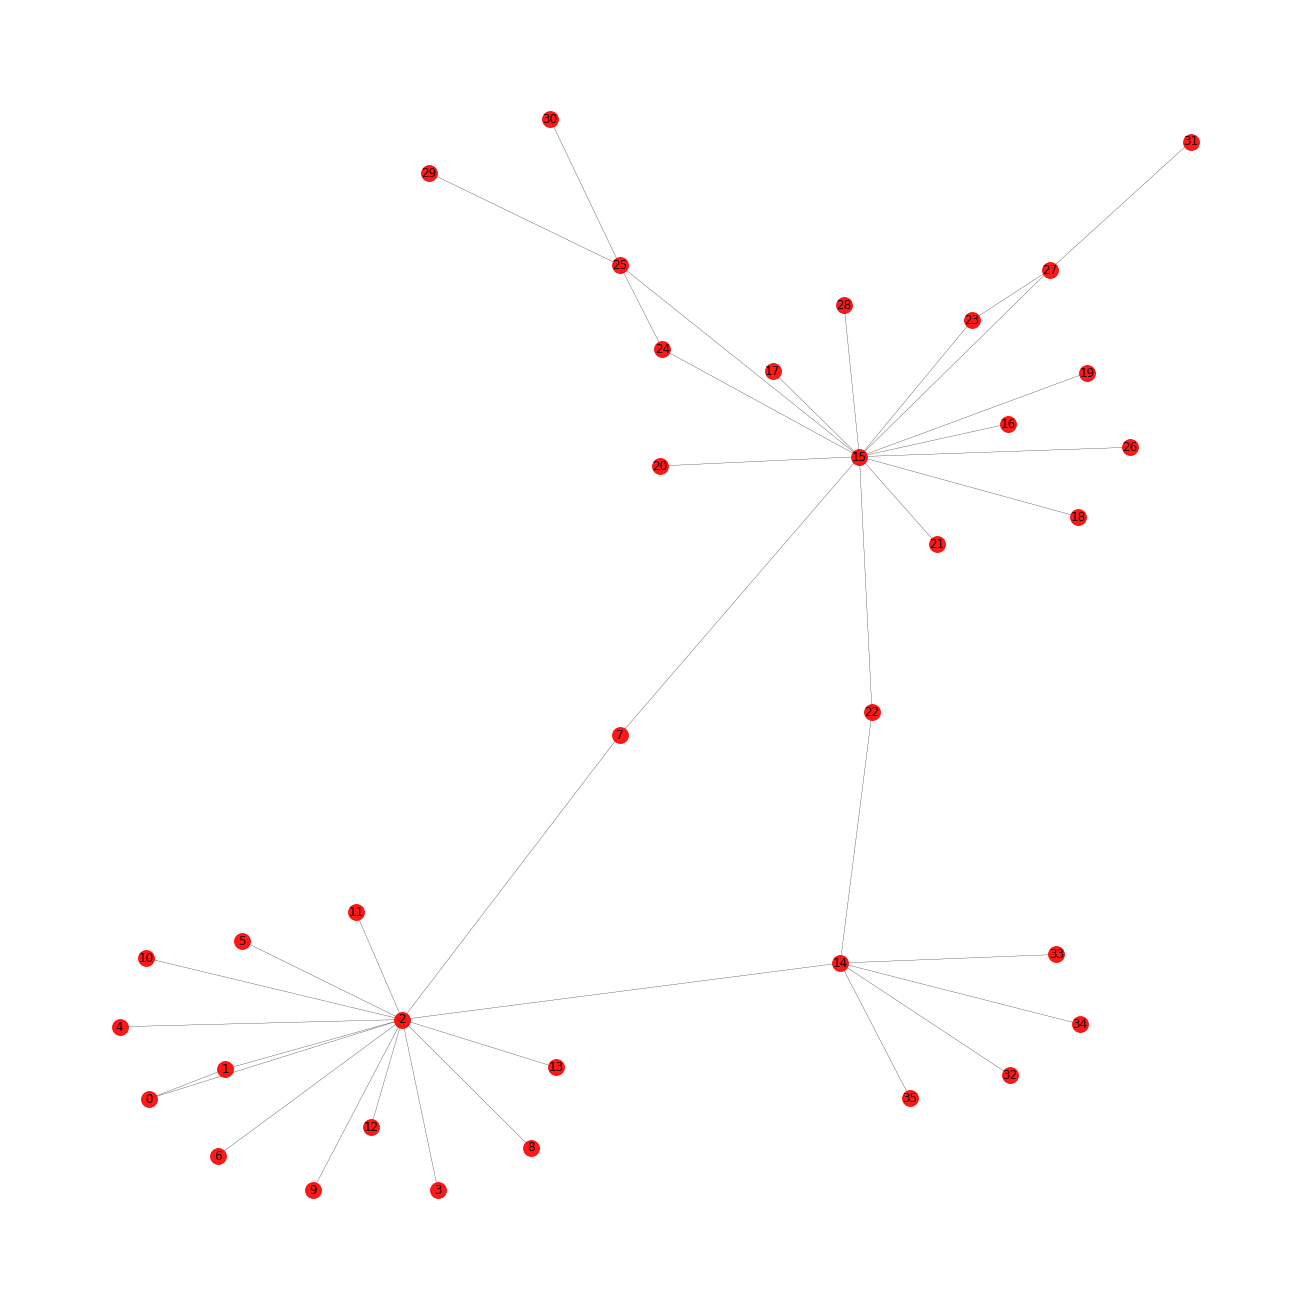

In [185]:
# let's plot it

ids_label={} # this dictionary is needed to show the node ids
counter=0
for i in G.nodes():
    ids_label[i]=counter
    counter+=1
    
plt.figure(1,figsize=(18,18))
nx.draw(G, pos=nx.spring_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black"
        ,node_color="Red",labels=ids_label,font_size=12)

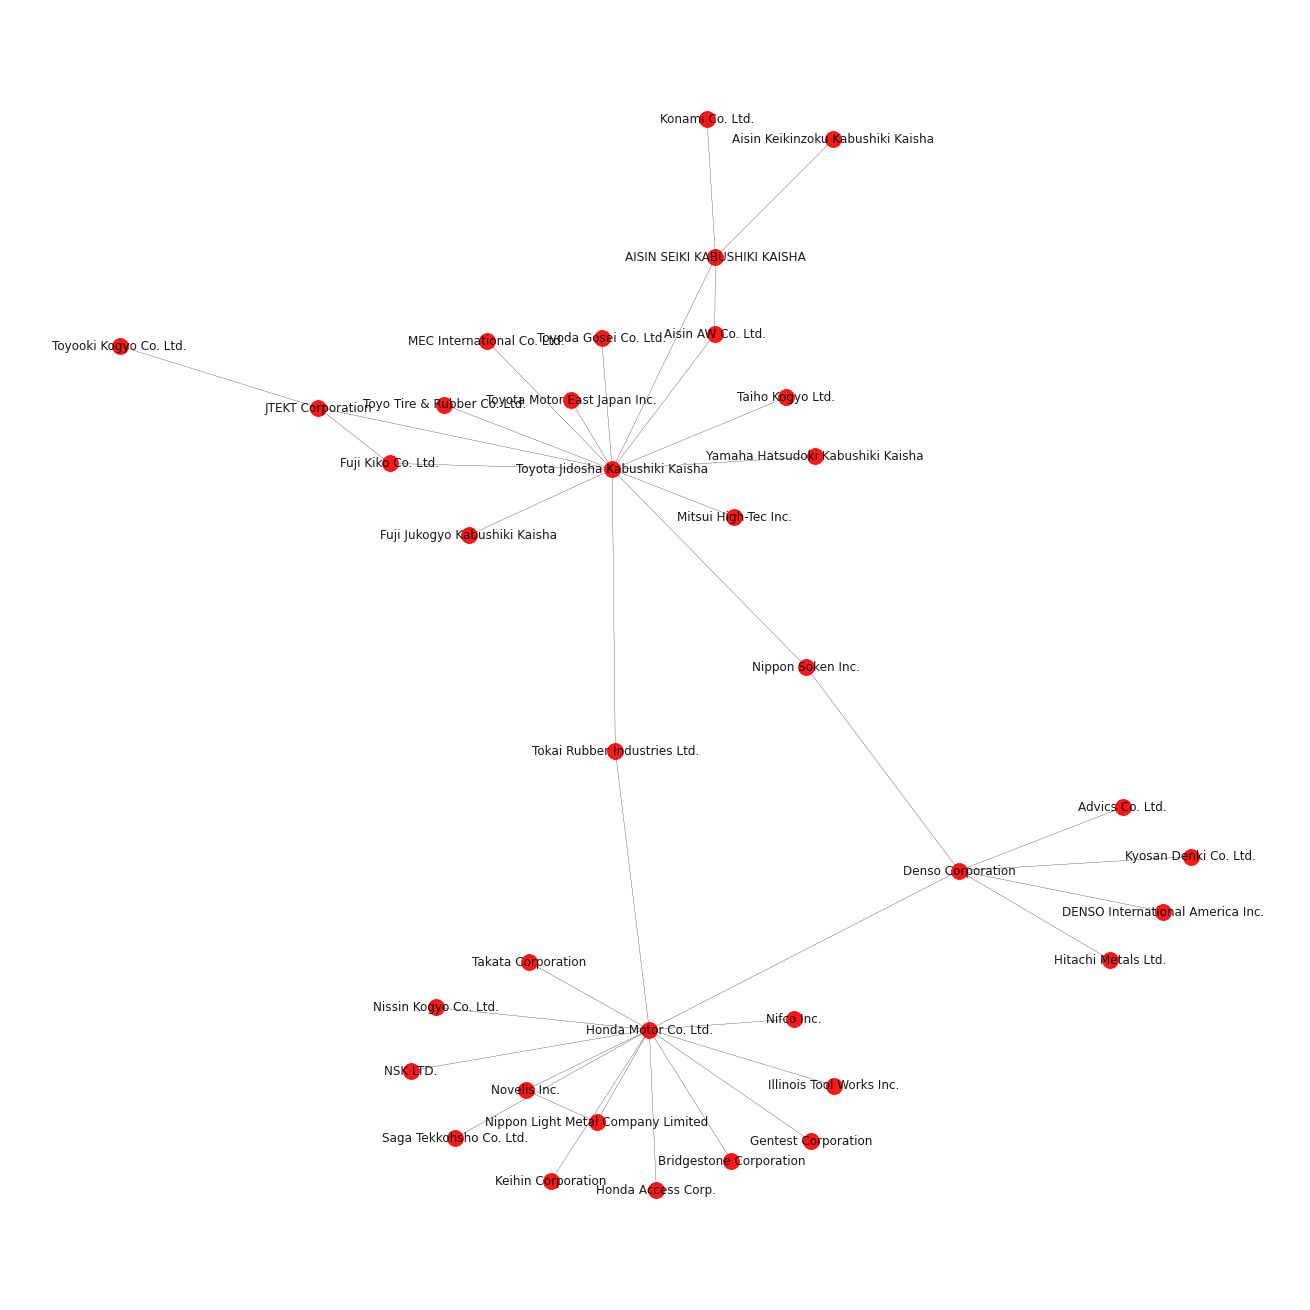

In [207]:
# let's plot it

ids_label={} # this dictionary is needed to show the node ids
counter=0
for i in G.nodes():
    ids_label[i]=i
    counter+=1
    
plt.figure(1,figsize=(18,18))
nx.draw(G, pos=nx.spring_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black"
        ,node_color="Red",labels=ids_label,font_size=12)

In [186]:
# let's focus first on the level of cohesiveness

# what's the density?
N=G.number_of_nodes()

Density= G.number_of_edges()/(N*(N-1.)/2.)  # this is the formula for the density

print (Density)

0.06190476190476191


In [187]:
# what about the clustering?

clustering=nx.clustering(G)

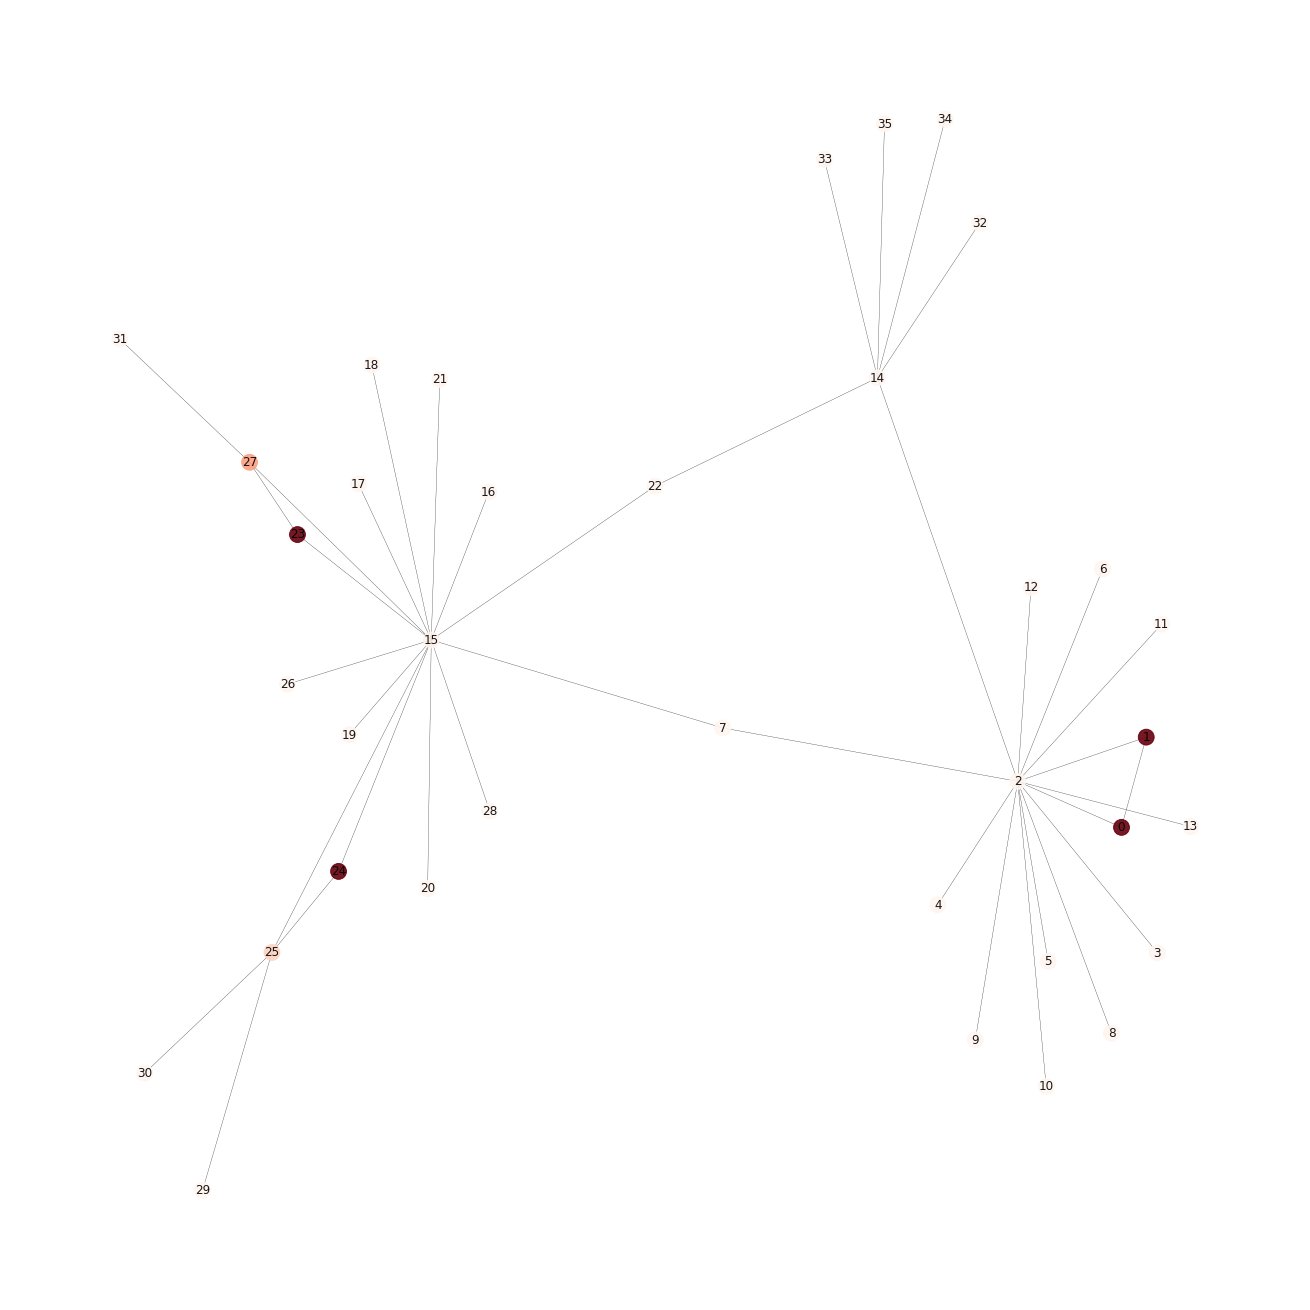

In [188]:
# let's plot the values of clustering
color_code=[]
for i in clustering:
    color_code.append(clustering[i])

plt.figure(1,figsize=(18,18))
nx.draw(G, pos=nx.spring_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black",cmap='Reds'
        ,node_color=color_code,labels=ids_label,font_size=12)

In [189]:
eff_size=nx.effective_size(G)

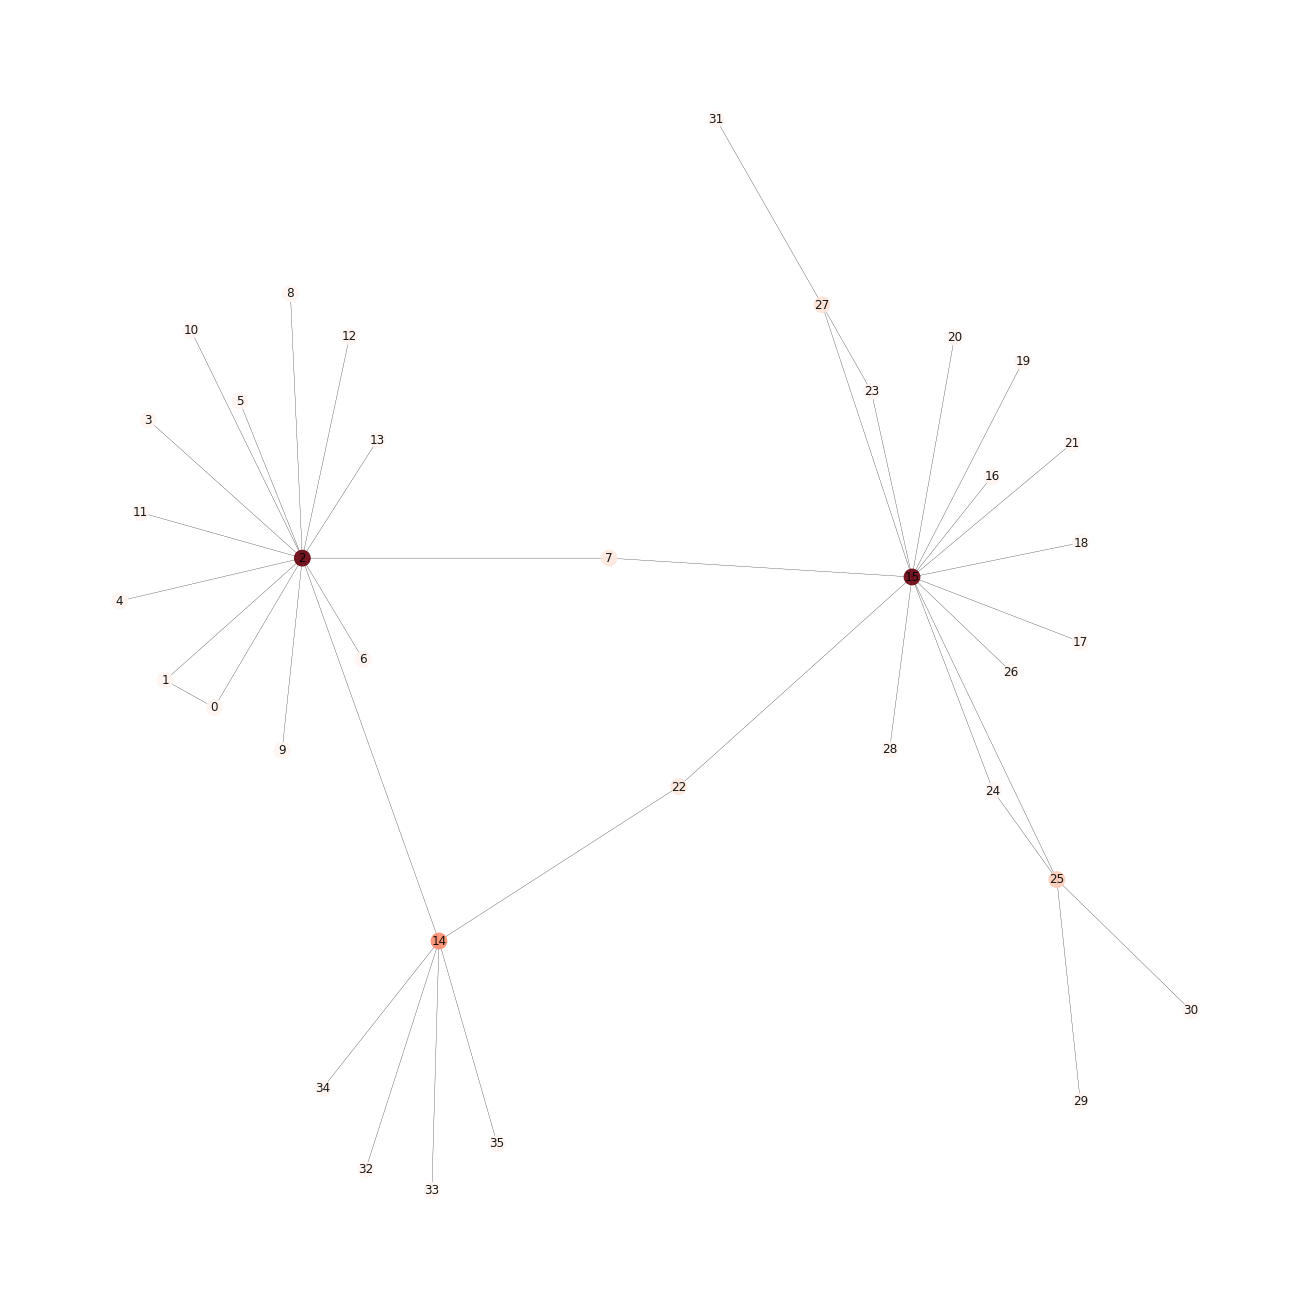

In [190]:
color_code=[]
for i in eff_size:
    color_code.append(eff_size[i])

plt.figure(1,figsize=(18,18))
nx.draw(G, pos=nx.spring_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black",cmap='Reds'
        ,node_color=color_code,labels=ids_label,font_size=12)

In [200]:
# what about the attributes? 
# let's check
a=open('data/USPTO_2012_5_proj_attributes_NEW.csv','r',encoding='latin1')

for i in a:
    n=i.strip().split(",")
    print (n)
a.close()

['ID', 'Patent_industry', 'University', 'Patent_count', 'Turnover_lay', 'Turnover_2012', 'Total_assets_2012', 'Employees_2012', 'R&D_2012', 'Country_code']
['Bridgestone Corporation', '5', '0', '672', '32271274', '35121178', '35115551', '143448', '956684', '4']
['Denso Corporation', '5', '0', '20118', '48105196', '38034234', '42263337', '132276', '3563038', '4']
['AISIN SEIKI KABUSHIKI KAISHA', '5', '0', '2214', '302352', '0', '0', '0', '0', '4']
['Aisin AW Co. Ltd.', '5', '0', '1246', '13036274', '0', '0', '0', '0', '4']
['Toyota Jidosha Kabushiki Kaisha', '5', '0', '9120', '276669260', '234351491', '376880705', '333498', '8576251', '4']
['Honda Motor Co. Ltd.', '5', '0', '8143', '144657174', '104917126', '144825890', '190338', '5950823', '4']
['Advics Co. Ltd.', '5', '0', '128', '2103944', '0', '0', '0', '0', '4']
['Nippon Soken Inc.', '5', '0', '374', '0', '0', '0', '0', '0', '4']
['JTEKT Corporation', '5', '0', '490', '13571616', '11338567', '10907414', '41714', '386139', '4']
['Ke

In [201]:
# same format of your attribute file!
a=open('data/USPTO_2012_5_proj_attributes_NEW.csv','r',encoding='latin1')
c=0
for i in a:
    n=i.strip().split(",")
    if c>0:  # we need to skip the first line
        id_node=n[0]
        Patent_industry=n[1]
        University=n[2]
        Patent_count=float(n[3])
        Turnover_lay=float(n[4])
        Turnover_2012=float(n[5])
        Total_assets_2012=float(n[6])
        Employees_2012=float(n[7])
        RD_2012=float(n[8])
        Country_code=int(n[9])
    
        # let's store in memory some info
        G.nodes[id_node]['Patent_count']=Patent_count
        G.nodes[id_node]['Country_code']=Country_code
        G.nodes[id_node]['RD_2012']=RD_2012
    c+=1
a.close()

In [209]:
code_color=[]
for i in G.nodes():
    code_color.append(G.nodes[i]['Patent_count'])
    

ids_label={} # this dictionary is needed to show the node ids
counter=0
for i in G.nodes():
    ids_label[i]=counter
    counter+=1

plt.figure(1,figsize=(14,14))  # we use this command to make sure we are able to see the network

nx.draw(G, pos=nx.spring_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black",cmap='Reds'
        ,node_color=code_color,labels=ids_label,font_size=12)

KeyError: 'Patent_count'

In [203]:
code_color=[]
for i in G.nodes():
    code_color.append(G.nodes[i]['RD_2012'])
    

plt.figure(1,figsize=(14,14))  # we use this command to make sure we are able to see the network

nx.draw(G, pos=nx.spring_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black",cmap='Reds'
        ,node_color=code_color,labels=ids_label,font_size=12)

KeyError: 'RD_2012'

In [199]:
code_color=[]
for i in G.nodes():
    code_color.append(G.nodes[i]['Country_code'])

plt.figure(1,figsize=(14,14))  # we use this command to make sure we are able to see the network

nx.draw(G, pos=nx.spring_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black",cmap='Reds'
        ,node_color=code_color,labels=ids_label,font_size=12)

KeyError: 'Country_code'

In [204]:
# we can also change the labels to reflect the country name
# you find the dictionary in the spreadsheet of your dataset!
# you can cut and paste this one!
diz_country={}
diz_country[0]='No classification'
diz_country[1]='US'
diz_country[2]='UK'
diz_country[3]='Australia'
diz_country[4]='Japan'
diz_country[5]='Taiwan'
diz_country[6]='France'
diz_country[7]='Germany'
diz_country[8]='Republic of Korea'
diz_country[9]='Korea'
diz_country[10]='China'
diz_country[11]='Switzerland'


ids_label={}
for i in G.nodes():
    country_code=G.nodes[i]['Country_code']
    ids_label[i]=diz_country[country_code]

code_color=[]
for i in G.nodes():
    code_color.append(G.nodes[i]['Country_code'])

plt.figure(1,figsize=(14,14))  # we use this command to make sure we are able to see the network

nx.draw(G, pos=nx.spring_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black",cmap='Reds'
        ,node_color=code_color,labels=ids_label,font_size=15)

KeyError: 'Country_code'